# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# Import the class
from xopt import Xopt

In [2]:
!mkdir temp

mkdir: temp: File exists


The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
# Make a proper input file. 
YAML="""
xopt:
  output_path: temp
  
algorithm:
  name: cnsga
  options:
    max_generations: 50
    population_size: 128
    show_progress: True
  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

"""

In [4]:
# Optional: Connect the function directly
# from xopt.tests.evaluators.TNK import evaluate_TNK 
# config['simulation']['evaluate'] = evaluate_TNK 

X = Xopt(YAML)
X


            Xopt 
________________________________           
Version: 0.5.1+0.gbb504cc.dirty
Configured: True
Config as YAML:
xopt: {output_path: /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp}
algorithm:
  name: cnsga
  options: {max_generations: 50, population_size: 128, show_progress: true, population: null,
    crossover_probability: 0.9, mutation_probability: 1.0, selection: auto, verbose: null,
    seed: null}
  function: xopt.cnsga.cnsga
simulation:
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0.0, 3.14159]
    x2: [0.0, 3.14159]
  constraints:
    c1: [GREATER_THAN, 0.0]
    c2: [LESS_THAN, 0.5]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constants: {a: dummy_constant}
  linked_variables: {x9: x1}

In [5]:
# Note that the repr string contains all of the config information
X.random_evaluate()

{'y1': 1.6213575042506483,
 'y2': 1.0569607591410695,
 'c1': 2.8443247373151306,
 'c2': 1.5676479395622391,
 'some_array': array([1, 2, 3])}

In [6]:
#Optional: Connect the function directly
# from xopt.tests.evaluators.TNK import evaluate_TNK 
# X.config['simulation']['evaluate'] = evaluate_TNK 
# X.configure_simulation()

By default, all messages go to the logger. This allows notebook printing without timestamps of those messages.

In [7]:
from xopt import output_notebook
output_notebook()

# Run CNSGA

CNSGA is designed to run in parallel with an asynchronous executor as defined in PEP 3148

In [8]:
# Pick one of these

#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [9]:
# Change max generations
X.algorithm['options']['max_generations'] = 10
X.run(executor=executor)

Starting at time 2022-05-02T07:17:23-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.5.1+0.gbb504cc.dirty
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Initializing with a new population, size 128
Maximum generations: 10
____________________________________________________
128 fitness calculations for initial generation
done.
Submitting fi

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 0:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 0 completed in 0.00084 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_1.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_1.json


Generation 1:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 1 completed in 0.00186 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_2.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_2.json


Generation 2:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 2 completed in 0.00177 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_3.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_3.json


Generation 3:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 3 completed in 0.00175 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_4.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_4.json


Generation 4:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 4 completed in 0.00165 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_5.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_5.json


Generation 5:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 5 completed in 0.00162 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_6.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_6.json


Generation 6:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 6 completed in 0.00168 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_7.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_7.json


Generation 7:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 7 completed in 0.00170 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_8.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_8.json


Generation 8:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 8 completed in 0.00178 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_9.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_9.json


Generation 9:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 9 completed in 0.00177 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_10.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_10.json


In [10]:
# The last population is saved internally:
list(X.results)

['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']

In [11]:
X.results['outputs'][0:5]

[{'y1': 0.47706602956618605,
  'y2': 0.8806649970302667,
  'c1': 0.012084199343103756,
  'c2': 0.14543180696391197,
  'some_array': array([1, 2, 3])},
 {'y1': 0.47706602956618605,
  'y2': 0.8806649970302667,
  'c1': 0.012084199343103756,
  'c2': 0.14543180696391197,
  'some_array': array([1, 2, 3])},
 {'y1': 1.0133619605818973,
  'y2': 0.1439093009169649,
  'c1': 0.11098020653312693,
  'c2': 0.3903410885459342,
  'some_array': array([1, 2, 3])},
 {'y1': 0.2528744533355902,
  'y2': 0.9487403354409942,
  'c1': 0.015868746442520558,
  'c2': 0.2624389244658794,
  'some_array': array([1, 2, 3])},
 {'y1': 0.2528744533355902,
  'y2': 0.9487403354409942,
  'c1': 0.015868746442520558,
  'c2': 0.2624389244658794,
  'some_array': array([1, 2, 3])}]

In [12]:
# Increase the max_generations, and it will continue where it left off
X.algorithm['options']['max_generations'] = 20
X.run(executor=executor)

Starting at time 2022-05-02T07:17:25-07:00

    
    
     ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
    ▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
    ▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
    ▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
    ▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
    ░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
      ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
    ░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
    ░ ░               ░       ░        ░       ░  ░
    ░                                              
    
    
    Continuous Non-dominated Sorting Genetic Algorithm
    Version 0.5.1+0.gbb504cc.dirty
    
Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
Loading config from dict.
Initializing with existing population, size 128
Maximum generations: 31
____________________________________________________
128 fitness calculations for initial g

  0%|          | 0/128 [00:00<?, ?it/s]

Generation 11:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 11 completed in 0.00334 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_12.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_12.json


Generation 12:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 12 completed in 0.00301 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_13.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_13.json


Generation 13:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 13 completed in 0.00294 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_14.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_14.json


Generation 14:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 14 completed in 0.00300 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_15.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_15.json


Generation 15:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 15 completed in 0.00295 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_16.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_16.json


Generation 16:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 16 completed in 0.00294 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_17.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_17.json


Generation 17:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 17 completed in 0.00288 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_18.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_18.json


Generation 18:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 18 completed in 0.00278 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_19.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_19.json


Generation 19:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 19 completed in 0.00272 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_20.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_20.json


Generation 20:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 20 completed in 0.00273 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_21.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_21.json


Generation 21:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 21 completed in 0.00278 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_22.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_22.json


Generation 22:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 22 completed in 0.00282 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_23.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_23.json


Generation 23:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 23 completed in 0.00296 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_24.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_24.json


Generation 24:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 24 completed in 0.00300 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_25.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_25.json


Generation 25:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 25 completed in 0.00300 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_26.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_26.json


Generation 26:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 26 completed in 0.00296 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_27.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_27.json


Generation 27:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 27 completed in 0.00291 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_28.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_28.json


Generation 28:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 28 completed in 0.00285 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_29.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_29.json


Generation 29:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 29 completed in 0.00273 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_30.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_30.json


Generation 30:   0%|          | 0/128 [00:00<?, ?it/s]

Generation 30 completed in 0.00250 minutes
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/gen_31.json
Pop written to  /Users/chrisonian/Code/GitHub/Xopt/examples/basic/temp/pop_31.json


# Run with MPI

In [13]:
#X.save('test.json')
#!mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run -vv --logfile xopt.log test.json 

# Plot

Text(0.5, 1.0, 'test_TNK')

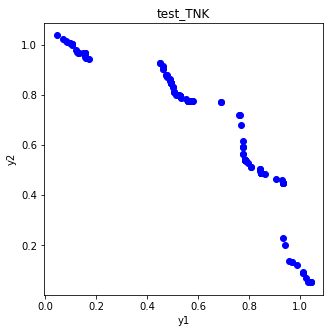

In [14]:
# Extract objectives from output
key1, key2 = list(X.vocs.objectives)

x = [o[key1] for o in X.results['outputs']]
y = [o[key2] for o in X.results['outputs']]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, color='blue')
ax.set_xlabel(key1)
ax.set_ylabel(key2)
ax.set_aspect('auto')
ax.set_title(X.simulation['name'])

In [15]:
# Cleanup
!rm -r temp